In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Slider

import random
import math
import numpy as np


In [2]:
df = pd.read_csv("../dataset/exoplanet.eu_catalog.csv")

orbit_data = df[["semi_major_axis","eccentricity", "temp_calculated"]].dropna()
orbit_data["semi_minor_axis"] = orbit_data["semi_major_axis"]*(1 - orbit_data["eccentricity"]**2)**0.5
orbit_data["focus_length"] = (orbit_data["semi_major_axis"]**2 - orbit_data["semi_minor_axis"]**2)**0.5

In [3]:
au = 1.495978707 * 10**11
planets = {
    'name': ['sun', 'mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune'],
    'semi_major_axis': [696340/au, 0.3871, 0.7233, 1, 1.5273, 5.2028, 9.5388, 19.1914, 30.0611],
    'color': ['#FDB813', '#B5A7A7', '#d3a567', '#6b93d6', '#c1440e', '#90614D', '#C5AB6E', '#4FD0E7', '#4b70dd'],
    'eccentricity': [0 for i in range(9)],
    'focus_length': [0 for i in range(9)]
    }
planets = pd.DataFrame(data=planets)
planets["semi_minor_axis"] = planets["semi_major_axis"]

<IPython.core.display.Javascript object>


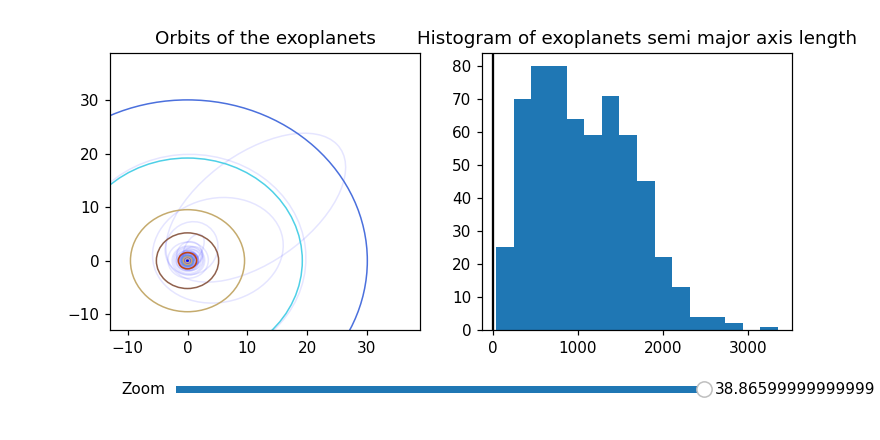

Text(0.5, 1.0, 'Orbits of the exoplanets')

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].set_xlim(-2/3,2)
axs[0].set_ylim(-2/3,2)
axs[0].set_title('Orbits of the exoplanets')

In [5]:
for index, orbit in orbit_data.iterrows():
        # for index, orbit in orbit_data.head(100).iterrows():
        angle = random.randint(15,75)
        focus_shift_x = orbit["focus_length"]*math.cos(3.14*angle/180)
        focus_shift_y = orbit["focus_length"]*math.sin(3.14*angle/180)
        axs[0].add_patch(mpl.patches.Ellipse((focus_shift_x, focus_shift_y), 2*orbit["semi_major_axis"],2*orbit["semi_minor_axis"], angle=angle, edgecolor='blue',facecolor='none', alpha=0.1))

for index, planet in planets.iterrows():
        # for index, planet in planet_data.head(100).iterrows():
        axs[0].add_patch(mpl.patches.Ellipse((0, 0), 2*planet["semi_major_axis"],2*planet["semi_minor_axis"], edgecolor=planet["color"], facecolor='none', alpha=1, label=planet["name"]))



In [6]:
# plt.subplots_adjust(bottom=0.25)

# axs[1].set_xlim(-1,50)
# axs[1].hist(orbit_data["semi_major_axis"], bins='auto', log=True)
# axs[1].set_title('Histogram of exoplanets semi major axis length')

plt.subplots_adjust(bottom=0.25)

axs[1].hist(orbit_data["temp_calculated"], bins='auto')
axs[1].set_title('Histogram of exoplanets semi major axis length')

Text(0.5, 1.0, 'Histogram of exoplanets semi major axis length')

In [7]:
# Create the RangeSlider
slider_ax = plt.axes([0.20, 0.1, 0.60, 0.03])
slider = Slider(
    ax=slider_ax,
    label='Zoom',
    valmin=-2,
    valmax=np.log10(orbit_data["semi_major_axis"].max()*2),
    valinit=2,
)

In [8]:
# Create the Vertical lines on the histogram
limit_line = axs[1].axvline(np.log(slider.val), color='k')

In [9]:
def update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)

    # amp = np.log(slider.val)
    amp = 10**slider.val
    slider.valtext.set_text(amp)

    # Update the image's colormap
    axs[0].set_xlim(-amp/3,amp)
    axs[0].set_ylim(-amp/3,amp)

    # Update the position of the vertical lines
#     limit_line.set_xdata([amp, amp])

    # Redraw the figure to ensure it updates
    fig.canvas.draw_idle()

In [10]:
slider.on_changed(update)
plt.show()